# Reporting on sales data
## 📖 Background
You work in the accounting department of a company that sells motorcycle parts. The company operates three warehouses in a large metropolitan area.

You’ve recently learned data manipulation and plotting, and suggest helping your colleague analyze past sales data. Your colleague wants to capture sales by payment method. She also needs to know the average unit price for each product line.

## 💾 The data

#### The sales data has the following fields:
- "date" - The date, from June to August 2021.
- "warehouse" - The company operates three warehouses: North, Central, and West.
- "client_type" - There are two types of customers: Retail and Wholesale.
- "product_line" - Type of products purchased.
- "quantity" - How many items were purchased.
- "unit_price" - Price per item sold.
- "total" - Total sale = quantity * unit_price.
- "payment" - How the client paid: Cash, Credit card, Transfer.

## 💪 Challenge
Create a report to answer your colleague's questions. Include:

1. What are the total sales for each payment method?
2. What is the average unit price for each product line?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)
5. Summarize your findings.

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
df = pd.read_csv('data/sales_data.csv', parse_dates=['date'])
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1000 non-null   datetime64[ns]
 1   warehouse     1000 non-null   object        
 2   client_type   1000 non-null   object        
 3   product_line  1000 non-null   object        
 4   quantity      1000 non-null   int64         
 5   unit_price    1000 non-null   float64       
 6   total         1000 non-null   float64       
 7   payment       1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 62.6+ KB


# Q1. What are the total sales for each payment method?

In [4]:
total_sales_per_payment = df.groupby('payment')['total'].sum().reset_index()
total_sales_per_payment.columns = ['payment_method', 'total_sales']
total_sales_per_payment = total_sales_per_payment.sort_values(by = 'total_sales', ascending = False)
total_sales_per_payment

,payment_method,total_sales
2,Transfer,"159,642.33"
1,Credit card,"110,271.57"
0,Cash,"19,199.10"


# Q2. What is the average unit price for each product line?

In [5]:
avg_unit_price = df.groupby('product_line')['unit_price'].mean().reset_index()
avg_unit_price.columns = ['product_line', 'avg_unit_price']
avg_unit_price = avg_unit_price.sort_values(by = 'avg_unit_price', ascending = False)
avg_unit_price

,product_line,avg_unit_price
2,Engine,60.09
3,Frame & body,42.83
5,Suspension & traction,33.97
1,Electrical system,25.59
4,Miscellaneous,22.81
0,Breaking system,17.74


# Q3. Create plots to visualize findings for questions 1 and 2.

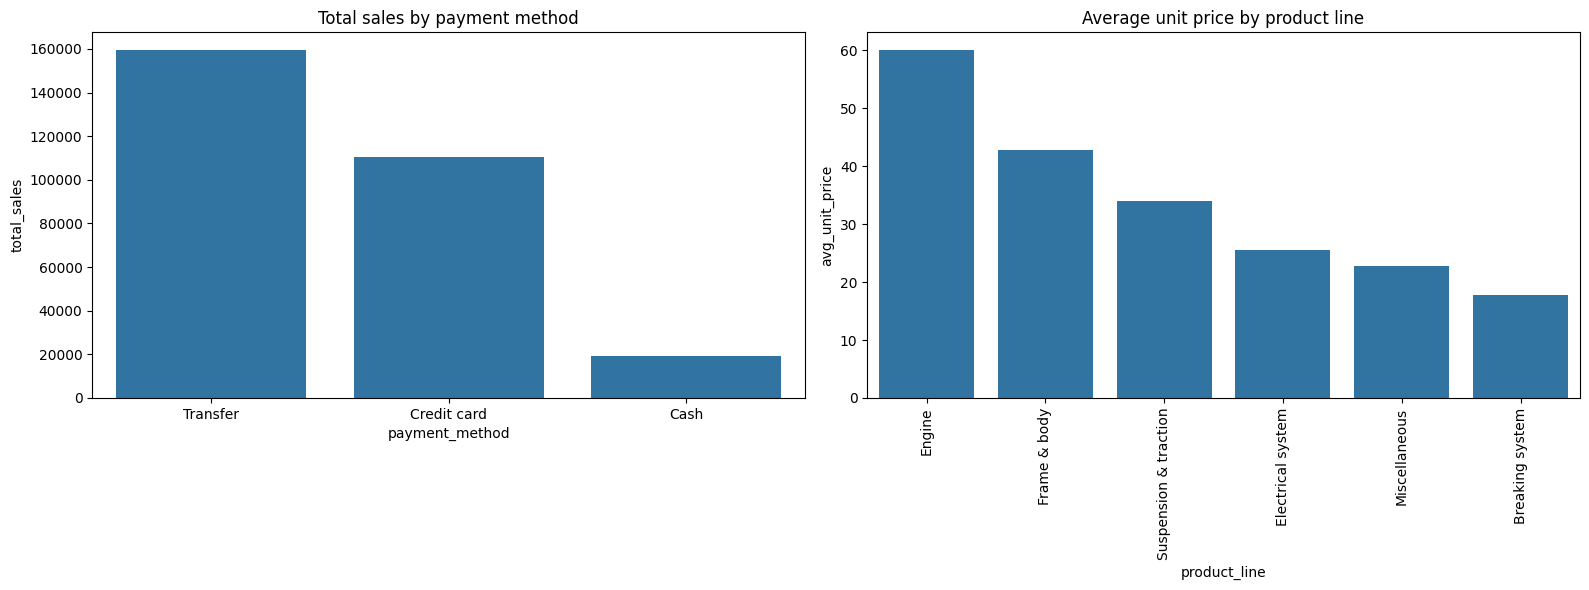

In [6]:
fig, axs = plt.subplots(1, 2, figsize = (16, 6))

sns.barplot(data = total_sales_per_payment, x = 'payment_method', y = 'total_sales', ax = axs[0])
sns.barplot(data = avg_unit_price, x = 'product_line', y = 'avg_unit_price', ax = axs[1])

axs[0].set_title("Total sales by payment method")

axs[1].tick_params(axis = 'x', rotation = 90)
axs[1].set_title("Average unit price by product line")

plt.tight_layout()

# Q4. Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)

## Q4.1 What is the average purchase value by client type?

In [7]:
avg_purchase_by_client = df.groupby('client_type')['total'].mean().sort_values(ascending = False).reset_index()
avg_purchase_by_client.columns = ['client_type', 'avg_purchase_value']
avg_purchase_by_client

,client_type,avg_purchase_value
0,Wholesale,709.52
1,Retail,167.06


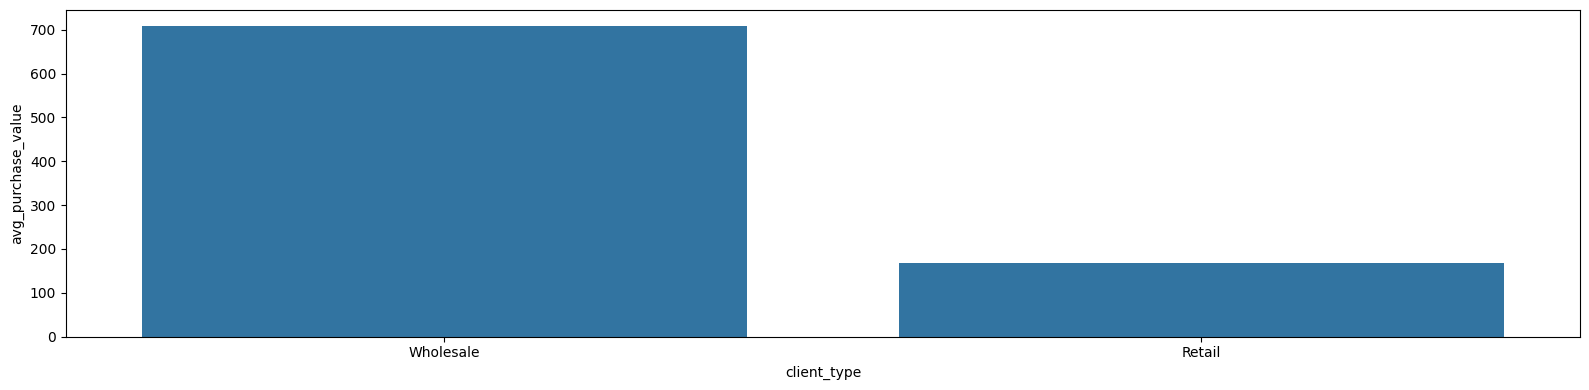

In [8]:
plt.figure(figsize = (16, 4))

sns.barplot(data = avg_purchase_by_client, x = 'client_type', y = 'avg_purchase_value')
plt.tight_layout()

## Q4.2 What is the total purchase value by product line?

In [9]:
total_sales_per_product_line = df.groupby('product_line')['total'].sum().reset_index()
total_sales_per_product_line.columns = ['product_line', 'total_sales']
total_sales_per_product_line = total_sales_per_product_line.sort_values(by = 'total_sales', ascending = False)
total_sales_per_product_line

,product_line,total_sales
5,Suspension & traction,"73,014.21"
3,Frame & body,"69,024.73"
1,Electrical system,"43,612.71"
0,Breaking system,"38,350.15"
2,Engine,"37,945.38"
4,Miscellaneous,"27,165.82"


## Q4.3 Which warehouse location sources the most reveneue?

In [10]:
total_sales_per_warehouse = df.groupby('warehouse')['total'].sum().reset_index()
total_sales_per_warehouse.columns = ['warehouse', 'total_sales']
total_sales_per_warehouse

,warehouse,total_sales
0,Central,"141,982.88"
1,North,"100,203.63"
2,West,"46,926.49"


## Q4.4 What is the current sales trend?

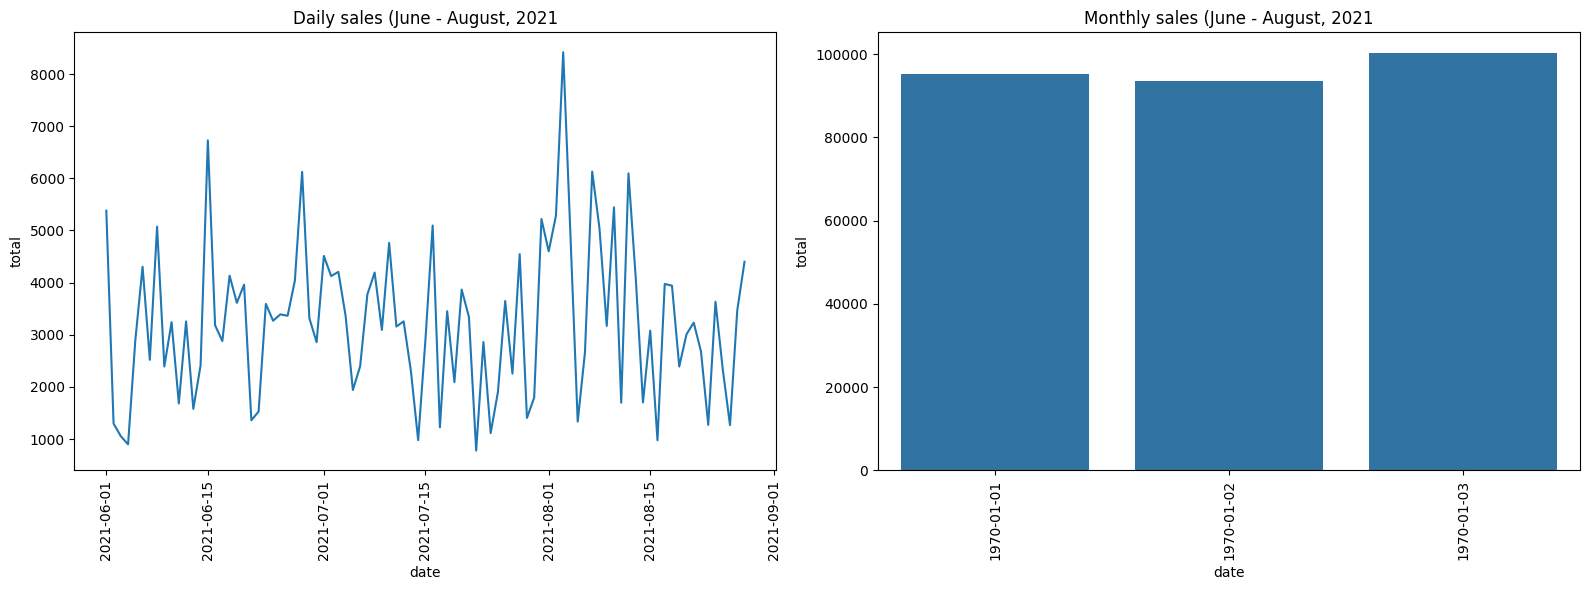

In [11]:
fig, axs = plt.subplots(1, 2, figsize = (16, 6))

daily_sales = df.set_index('date').resample("D")['total'].sum().reset_index()
month_sales = df.set_index('date').resample("M")['total'].sum().reset_index()

sns.lineplot(data = daily_sales, x = 'date', y = 'total', ax = axs[0])
sns.barplot(data = month_sales, x = 'date', y = 'total', ax = axs[1])

# Format the date labels
date_format = mdates.DateFormatter('%Y-%m-%d')  # Format: Year-Month-Day
axs[0].tick_params(axis = 'x', rotation = 90)
axs[0].xaxis.set_major_formatter(date_format)
axs[0].set_title("Daily sales (June - August, 2021")

axs[1].tick_params(axis = 'x', rotation = 90)
axs[1].xaxis.set_major_formatter(date_format)
axs[1].set_title("Monthly sales (June - August, 2021")
plt.tight_layout()

## Q4.5 What is the sales trend by product line?

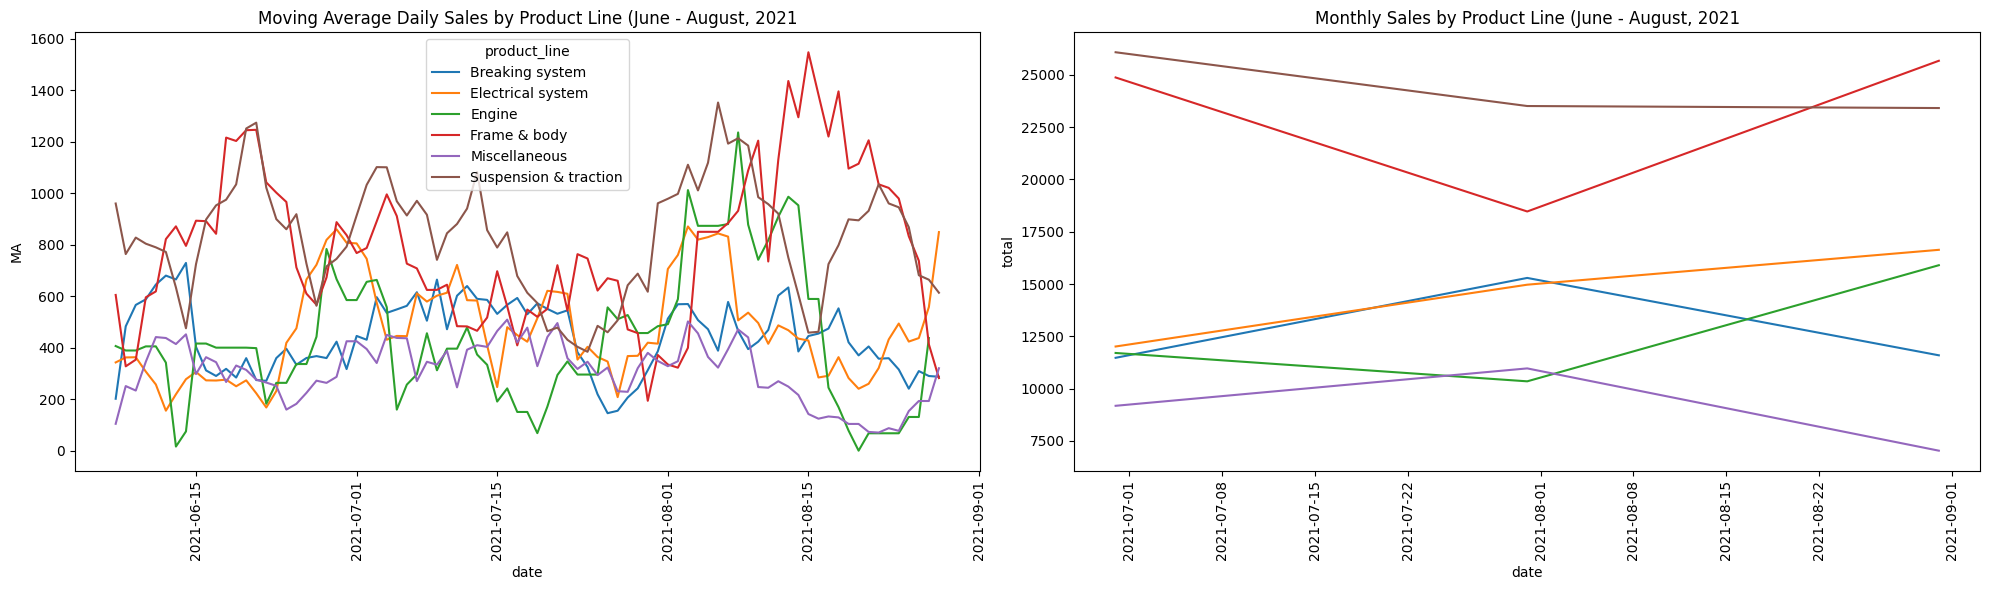

In [12]:
fig, axs = plt.subplots(1, 2, figsize = (20, 6))

daily_sales_product = df.set_index('date').groupby('product_line').resample("D")['total'].sum().reset_index()
month_sales_product = df.set_index('date').groupby('product_line').resample("M")['total'].sum().reset_index()

daily_sales_product['MA'] = daily_sales_product.groupby('product_line')['total'].transform(lambda x: x.rolling(window = 7, min_periods = 7).mean())


products = sorted(month_sales_product['product_line'].unique())

sns.lineplot(data = daily_sales_product, x = 'date', y = 'MA', ax = axs[0], hue = 'product_line', hue_order = products)
sns.lineplot(data = month_sales_product, x = 'date', y = 'total', ax = axs[1], hue = 'product_line', hue_order = products, legend = False)

# Format the date labels
date_format = mdates.DateFormatter('%Y-%m-%d')  # Format: Year-Month-Day
axs[0].tick_params(axis = 'x', rotation = 90)
axs[0].xaxis.set_major_formatter(date_format)
axs[0].set_title("Moving Average Daily Sales by Product Line (June - August, 2021")

axs[1].tick_params(axis = 'x', rotation = 90)
axs[1].xaxis.set_major_formatter(date_format)
axs[1].set_title("Monthly Sales by Product Line (June - August, 2021")
plt.tight_layout()

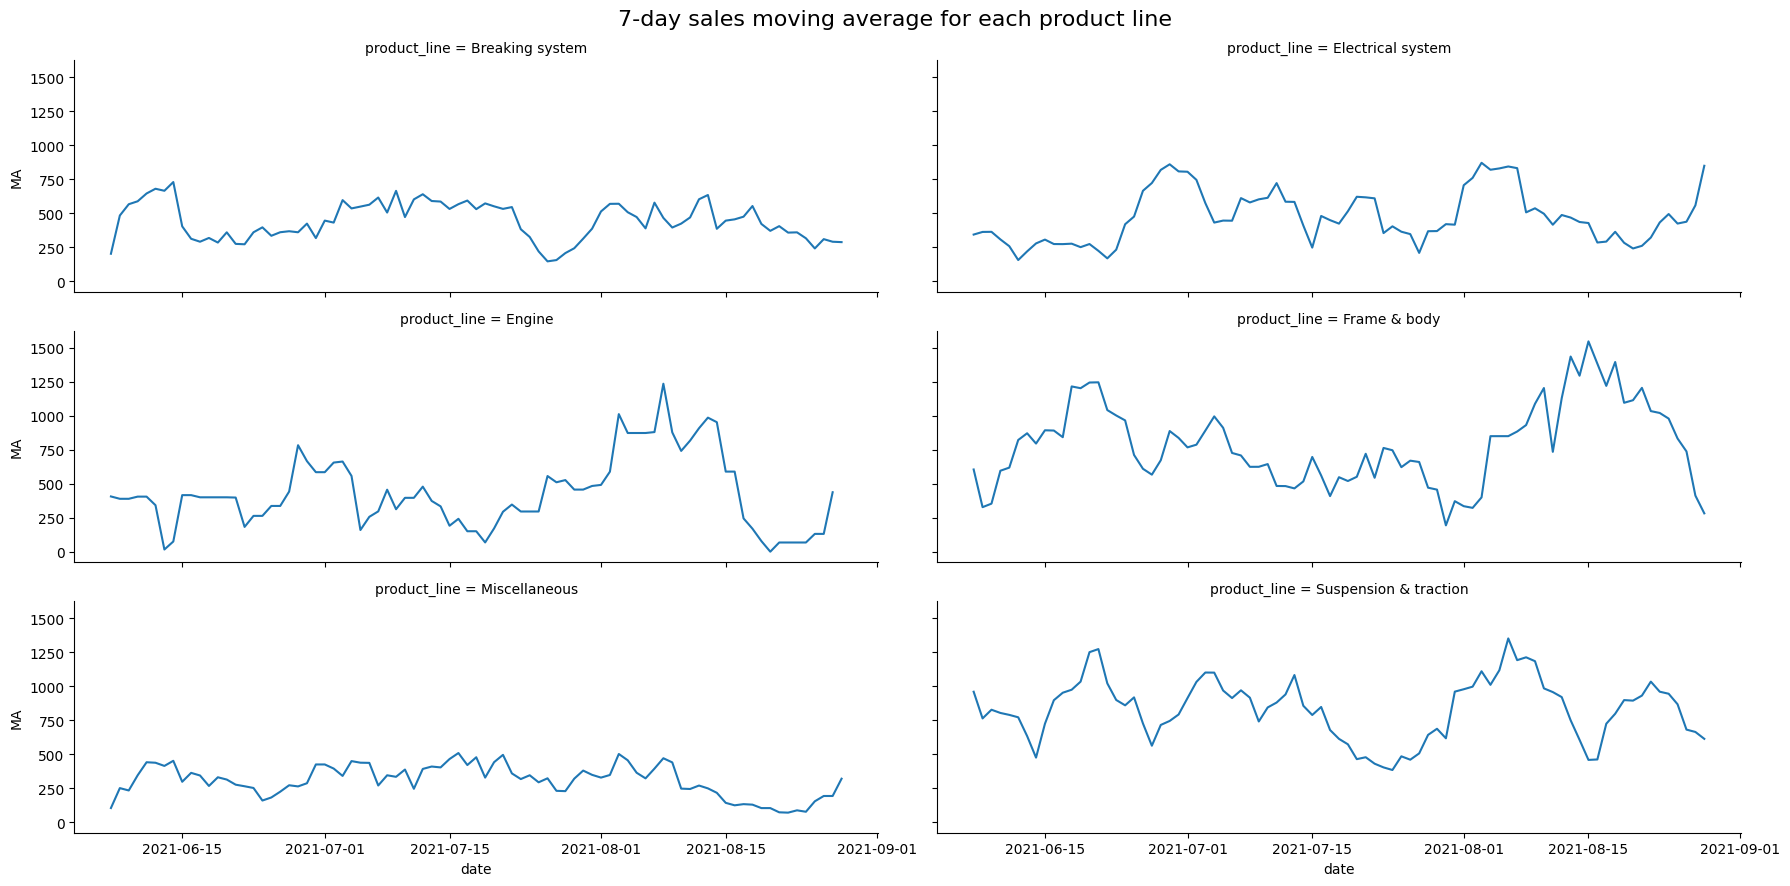

In [36]:
# Plot 7-day sales moving average for each product line

g = sns.FacetGrid(daily_sales_product,
                  col = 'product_line',
                  col_order = products,
                  col_wrap = 2, 
                  aspect = 3,
                  height = 3)
g.map(sns.lineplot, 'date', 'MA')

# Add a title above all subplots
g.fig.suptitle('7-day sales moving average for each product line', size=16)  # Customize size as needed

# Adjust subplots to fit the main title
g.fig.subplots_adjust(top=0.85)  # Adjust the top parameter to make space for title

plt.tight_layout()